Scikit-learn perusteet
======================
![Scikit-learn](https://upload.wikimedia.org/wikipedia/commons/thumb/0/05/Scikit_learn_logo_small.svg/1280px-Scikit_learn_logo_small.svg.png "Scikit-learn")

Asentaaksesi tarvittavat paketit omalla koneellasi harjoituksen suorittamista varten:
```
$ pip3 install scikit-learn pandas imbalanced-learn matplotlib==2.2.2
```




## Motivointia
Tämän nopean demon tarkoitus on näyttää miten helposti ja nopeasti kirjaston avulla saa suoritettua suoritettua 
yksinkertaisen luokittelun.

In [1]:
from sklearn.datasets import make_classification
from sklearn import svm
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

X, y = make_classification(n_samples=1000, n_features=4, n_classes=3, n_informative=2, n_clusters_per_class=1)
X_train, X_test, y_train, y_test = X[:50], X[50:], y[:50], y[50:]
clf = svm.SVC()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
report = classification_report(y_test, y_pred, target_names=["class A", "class B", "class C"])
score = accuracy_score(y_test, y_pred)
print("Luokittelun OA: {:.2f}".format(score))
print("Luokitteluraportti (PA=precision, UA=recall) :\n", report)

Luokittelun OA: 0.87
Luokitteluraportti (PA=precision, UA=recall) :
               precision    recall  f1-score   support

     class A       0.80      0.99      0.89       307
     class B       0.99      0.66      0.79       323
     class C       0.88      0.98      0.93       320

    accuracy                           0.87       950
   macro avg       0.89      0.88      0.87       950
weighted avg       0.89      0.87      0.87       950



/home/joona/IdeaProjects/MLCourse/venv/forNb/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


## Aineiston lataaminen
Suurin osa Pythonin koneoppimiskirjastoista tukee:
- Numpy Array
- Pandas 
- listat

Scikit-learn -kirjastossa on myös monia valmiita aineistoja algoritmien ja käsittelyketjujen testaamista varten moduulissa
`sklearn.datasets`. 

Lataa aluksi klassinen jo edellisessä harjoituksessa tutuksi tullut [Iris](https://en.wikipedia.org/wiki/Iris_flower_data_set)-aineisto.
Käytä hyväksi [datasets-dokumentaatiota](https://scikit-learn.org/stable/datasets/index.html).

In [2]:
from sklearn import datasets

# Lataa Iris-aineisto
dataset = datasets.load_iris() #TODO: None

print(dataset.DESCR)
print("Firt 5 rows:\n", dataset.data[:5])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

Havainnot ovat dataset-olion data-kentässä ja niiden luokat taas olion target-kentässä. 
Tyypillisesti havaintoja merkitään (isolla) kirjaimella `X` ja luokkia kirjaimella `y`.

In [3]:
y = dataset.target
X = dataset.data 
print("Ensimmäisellä havainnolla y:",y[0], "ja X:", X[0])

Ensimmäisellä havainnolla y: 0 ja X: [5.1 3.5 1.4 0.2]


Useimmiten aineiston joutuu kuitenkin lataamaan muulla tavalla, esimerkiksi CSV- tai HDF5-tiedostosta levyltä tai internetin yli esimerkiksi AWS S3:n sisältä. 
Tähän (ja niiiin moneen muuhun) [pandas](https://pandas.pydata.org) on oiva apuväline. 
Kirjoita dataset-olio csv-tiedostoksi ja lue se. Käytä hyväksesi [dokumentaatiota](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html). 

In [4]:
import pandas as pd

#Tyypillisesti pandas DataFrame-oliot nimetään df-nimellä
df = pd.DataFrame(data=dataset.data, columns=dataset.feature_names)
df["target"] = dataset.target
# Tyypillisesti luokat ovat ensimmäisessä sarakkeessa
df = df[["target"] + dataset.feature_names]
df.to_csv("iris_dataset.csv", sep=';', index=False)

# Lue aineisto levyltä
df = pd.read_csv("iris_dataset.csv", sep=';') #TODO: None

Nyt voit muodostaa havaintovektorin `X` ja luokat `y`.

In [5]:
y = df["target"] # huom: df["target"] on sama kuin df.target
X = df[dataset.feature_names]
print("Ensimmäisellä havainnolla y:",y.loc[0], "ja X:", X.loc[0])

Ensimmäisellä havainnolla y: 0 ja X: sepal length (cm)    5.1
sepal width (cm)     3.5
petal length (cm)    1.4
petal width (cm)     0.2
Name: 0, dtype: float64


Useimmiten kuitenkaan sarakkeiden nimet eivät ole tiedossa, joten järkevämpää on käyttää sarakkeiden numeroita.
Käytä hyväksesi [dokumentaatiota](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.iloc.html).

In [6]:
#TODO: None
y = df.iloc[:, 0]
X = df.iloc[:, 1:]

## Aineiston jakaminen
Scikit-learn mahdollistaa monia eri tapoja jakaa aineisto opetus- ja testijoukkoihin. Perinteisin tapa on käyttää 
[`train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)-funktiota. 

Jaa luomasi `X` ja luokat `y` opetus- ja testijoukkoihin `X_train, X_test, y_train` ja  `y_test` siten, että 
testijoukon osuus on 20% ja opetusjoukon osuus on 80% havainnoista. 

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # TODO: None

Yksi tapa varmistaa, että havainnot jakautuvat luokkiensa puolesta tasaisesti opeus- ja testijoukkoihin on käyttää moduulia 
[`StratifiedShuffleSplit`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedShuffleSplit.html).
Perinteisimmin sitä käytetään ristivalidoinnin yhteydessä.

In [8]:
from sklearn.model_selection import StratifiedShuffleSplit
sss = StratifiedShuffleSplit(n_splits=1, random_state=42, test_size=0.2)
train_index, test_index = next(sss.split(X, y))
X_train, X_test = X.iloc[train_index], X.iloc[test_index]
y_train, y_test = y.iloc[train_index], y.iloc[test_index]


## Aineiston esikäsittely
Aineistolle on usein tarve tehdä muutamia esikäsittelyvaiheita tilanteesta riippuen.

#### Standardointi
Aineistoa on usein hyvä standardoida ennen käyttöä. Tähän voi käyttää prosessointityökalua [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)
Standardointi suoritetaan opetusjoukon mukaan, mutta samaa oliota sovelletaan myös testausjoukon kanssa. 

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# TODO: None
scaler.fit(X_train)
X_train = scaler.transform(X_train)

#### Havaintovektoreiden muuttujien määrän vähentäminen
Muuttujien määrän voidaan vähentää pääkomponenttianalyysin avulla [PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)
Tällöin havaintovektoreiden alkuperäiset muuttujat korvataan pääkomponenttianalyysin luomilla ominaisvektoreilla.
Tämä välivaihe suoritetaan tyypillisesti vain, jos algoritmien opettaminen olisi muuten liian hidasta.

Luo PCA-olio, siten, että pääkomponentit selittää 90% havaintojen varianssista 


In [10]:
from sklearn.decomposition import PCA
# TODO: None
pca = PCA(n_components=0.99)
pca.fit(X_train)
X_train = pca.transform(X_train)
print("Muuttujien määrä oli ennen 4, nyt se on ", len(X_train[0]))

# TODO: [kuvaaja](https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html)

Muuttujien määrä oli ennen 4, nyt se on  3


Visualisoi vielä opetusjoukkoa kahden ensimmäisen PCA:n luomaa ominaisvektoria käyttäen

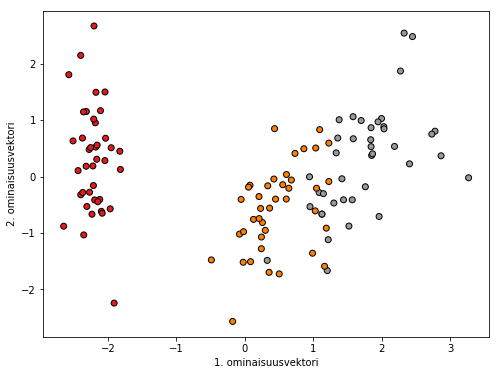

In [12]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.Set1,
            edgecolor='k')
ax.set_xlabel('1. ominaisuusvektori')
ax.set_ylabel('2. ominaisuusvektori')
plt.show()

Aineiston esikäsittelyn yhteydessä suoritettiin opetusjoukolle standardointi ja pääkomponenttianalyysi muuttujien vähentämiseksi.
Samat vaiheet suoritetaan nyt myös testausjoukolle. Tämä vaihe suoritetaan tyypillisesti vasta opettamisen jälkeen.

In [13]:
# TODO: None
X_test = scaler.transform(X_test)
X_test = pca.transform(X_test)


## Luokittelu

Datan esikäsittelyn jälkeen voidaan siirtyä luokitteluun.

### Opettaminen
Luo opetettu malli käyttäen algoritmia [KNeighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier)

In [13]:
# Lisää import-lause algoritmille
clf = None

Opeta [RF](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)

In [14]:
# Lisää import-lause algoritmille
clf = None

Opeta [SVM](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)

In [15]:
# Lisää import-lause algoritmille
#TODO: None
from sklearn.svm import SVC
clf = SVC()
clf.fit(X_train, y_train)



/home/joona/IdeaProjects/MLCourse/venv/forNb/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

##### Mallin tallentaminen
Kun malli on opetettu, sen voi tallentaa levylle myöhempää käyttöä varten. Tähän voi käyttää Pythonin pickle-moduulia,
tai tehokkaampaan tallennukseen Scikit-learnin suosittelemaa [joblib](https://joblib.readthedocs.io/en/latest/)-kirjastoa.
Mainittakoon tässä yhteydessä, että kirjasto soveltuu erinomaisesti myös laskennan lokaaliin rinnakkaistamiseen.

In [ ]:
from joblib import dump, load
# Tallennus
dump(clf, 'sklearn_harj1.joblib')
# Lataus
clf = load('sklearn_harj1.joblib')




### Testaaminen
Opettamisen jälkeen luonnollinen seuraava vaihe on mallin testaaminen.
 
### Ennusteiden luominen
Mallia voidaan nyt käyttää ennusteiden luomiseen. Luo ennustetut arvot testausjoukolle `X_test`.

In [16]:
# TODO: None
y_pred = clf.predict(X_test)
print("Viisi ensimmäistä ennustettua luokkaa:  {}".format(y_pred[:5]))
# to_numpy, jotta saman näköinen formaatti ylemmän tulosteen kanssa
print("Viisi ensimmäistä oikeaa luokkaa: \t{}".format(y_test[:5].to_numpy()))

Viisi ensimmäistä ennustettua luokkaa:  [0 2 1 1 0]
Viisi ensimmäistä oikeaa luokkaa: 	[0 2 1 1 0]


 
#### Evaluointi
Scikit-learn tarjoaa monia apuvälineitä mallien evaluoimiseksi ja tutustutaan niihin seuraavaksi.
Nopein tapa saada mallin yleinen tarkkuus (OA) on käyttää `clf.score()`-funktiota. Käytä `X_test` ja `y_test` -olioita.

In [17]:
OA = clf.score(X_test, y_test)
print("OA: {:.2f}".format(OA))


OA: 0.93


Usein kuitenkin halutaan saada selville muutakin, kuin pelkkä OA. Tällöin turvaudutaan [`sklearn.metrics`](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics)
-moduuliin. 

Saanti UA (recall), tarkkuus PA (precision) ja f1 ovat luokkakohtaisia, joten kokonaistuloksen saamiseksi ne on keskiarvoitettava. 
Käytä tässä keskiarvotusta 'micro', joka laskee yhteen oikeat positiiviset, väärät negatiiviset ja väärät positiiviset.
Toinen vaihtoehto olisi käyttää keskiarvotusta 'macro', joka laskisi keskiarvon metriikoista.

Laske alle arvot käyttäen `sklearn.metrics`-moduulia ja 'micro'-keskiarvotusta. Käytä `y_test` ja `y_pred` -olioita. 

In [18]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
# TODO: None
OA = accuracy_score(y_test, y_pred)
PA = precision_score(y_test, y_pred, average='micro')
UA = recall_score(y_test, y_pred, average='micro')
f1 = f1_score(y_test, y_pred, average='micro')

print("OA: {:.4f}, UA: {:.4f}, PA: {:.4f}, f1: {:.4f}".format(OA, UA, PA, f1))

OA: 0.9333, UA: 0.9333, PA: 0.9333, f1: 0.9333


Scikit-learn tarjoaa myös kattavan [luokitteluraportin](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) 


In [19]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred, target_names=dataset.target_names)
print(report)

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.90      0.90      0.90        10
   virginica       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



Raporttia tutkimalla voi selvittää mallin suoriutumisen. Nopeita silmäyksiä varten [sekaannusmatriisi](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html#sklearn.metrics.confusion_matrix)
voi antaa paremman kuvan.

In [20]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)


[[10  0  0]
 [ 0  9  1]
 [ 0  1  9]]


Selkeämpää esitystä varten piirretään myös graafinen versio sekaannusmatriisista

/home/joona/IdeaProjects/MLCourse/venv/forNb/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


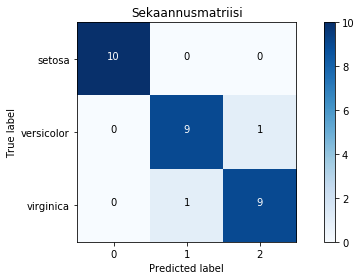

In [21]:
from utils import plot_confusion_matrix
plot_confusion_matrix(cm, [0,1,2], list(dataset.target_names), normalize=False)


Jotta solujen arvoista voi lukea rivikohtaisen UA-arvon, matriisin voi normalisoida

Normalisoitu sekaannusmatriisi:
 [[1.  0.  0. ]
 [0.  0.9 0.1]
 [0.  0.1 0.9]]


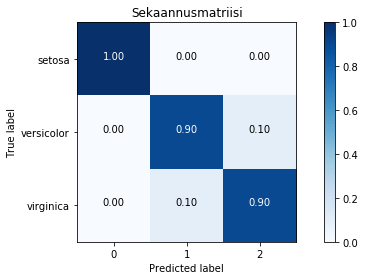

In [22]:
import numpy as np
print("Normalisoitu sekaannusmatriisi:\n", cm.astype('float') / cm.sum(axis=1)[:, np.newaxis])
plot_confusion_matrix(cm, [0,1,2], list(dataset.target_names), normalize=True)

Kokeile evaluointia muillakin algoritmeilla. Opeta ensin haluttu haluttu malli [Luokittelu](#Luokittelu)-kohdassa 
ja sen jälkeen luo `y_pred` kohdan [Ennusteiden luominen](#Ennusteiden-luominen) mukaan.

## Hyperparametrien optimointi
Tähän asti mallit on luotu käyttäen algoritmien oletusparametreja. Ovatko nämä kuitenkaan 
parhaat mahdolliset parametrit tähän ongelmaan?

Kokeile löytää parhaat [SVM](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)-algoritmin 
parametrit `C` ja `gamma` γ, jotta saisit mahdollisimman korkean OA:n.

In [23]:
from sklearn.svm import SVC
# Käytä desimaaliarvoja molempien parametrien kanssa
clf = SVC(C=0.1)
clf.fit(X_train, y_train)
print("OA: {:.4f}".format(clf.score(X_test, y_test)))

OA: 0.9000


/home/joona/IdeaProjects/MLCourse/venv/forNb/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Sen sijaan, että parametreja käytäisiin läpi manuaalisesti, niitä voi etsiä myös muilla tavoilla. [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)
tarjoaa mahdollisuuden käydä läpi määritelty kombinaatio parametreja. Jos siis sen annetaan käydä parametrit C∈{1,10}
ja γ∈{1,10}, käy etsijä läpi tilanteet, joissa (C=1 γ=1), (C=10 γ=1), (C=1 γ=10) ja (C=10 γ=10). Koska kyseessä 
on ristivalidointityyppinen (CV) etsijä, jokainen kombinaatio käydään ristivalidoinnin kanssa läpi. Oletuksena CV=3, 
joten yhteensä opetettuja malleja näillä parametreilla olisi 12.

In [27]:
from sklearn.model_selection import GridSearchCV
parameters = {'C':[1,10,20], 'gamma':[1,10,100]}
clf = GridSearchCV(SVC(), parameters)
clf.fit(X_train, y_train)
print("Parhaat parametrit: ", clf.best_params_)
print("Paras opetus OA: {:.4f}".format(clf.best_score_))
print("OA: {:.4f}".format(clf.score(X_test, y_test)))

Parhaat parametrit:  {'C': 1, 'gamma': 1}
Paras opetus OA: 0.9583
OA: 0.9667


/home/joona/IdeaProjects/MLCourse/venv/forNb/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/home/joona/IdeaProjects/MLCourse/venv/forNb/lib/python3.6/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Kun mahdollisia parametreja on enemmän, mutta GridSearchCV:n kanssa etsintä kävisi liian hitaaksi, mahdollisuus on 
valita vain osa parametreista sattuman avulla. [RandomizedSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)
on oiva valinta tähän. `n_iter`-parametrin avulla hallitaan kokeiltujen parametrikombinaatioiden määrä. Yhteensä malleja 
opetetaan siis CV*n_iter

In [26]:
from sklearn.model_selection import RandomizedSearchCV
parameters = {'C':[10**-3,10**-2, 10**-1,10**0,10**1,10**2,10**3,10**3], 
              'gamma':[10**-3,10**-2, 10**-1,10**0,10**1,10**2,10**3]}
clf = RandomizedSearchCV(SVC(), parameters, n_iter=20)
clf.fit(X_train, y_train)
print("Parhaat parametrit: ", clf.best_params_)
print("Paras opetus OA: {:.4f}".format(clf.best_score_))
print("OA: {:.4f}".format(clf.score(X_test, y_test)))

Parhaat parametrit:  {'gamma': 0.01, 'C': 100}
Paras opetus OA: 0.9750
OA: 0.9667


/home/joona/IdeaProjects/MLCourse/venv/forNb/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/home/joona/IdeaProjects/MLCourse/venv/forNb/lib/python3.6/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Hyperparametrioptimointia voi tehdä myös rinnakkain asettamalla parametrin `n_jobs`. Tämä onkin aina hyödyllistä asettaa,
jos laskentakoneen tehot riittäisivät (jos eivät riitä, ehkä fiksua olisi suorittaa laskentaa toisella koneella).

Esikäsittely, kuten standardointi ja PCA suoritetaan normaalisti hieman eri tavalla ristivalidointia käytettäessä hyperparametrioptimoinnissa, mutta siitä kerrotaan lisää seuraavassa harjoituksessa.

Hyperparametrioptimoinnin avuksi voi olla hyvä ottaa myös BayesSearchCV paketista 
[scikit-optimize](https://scikit-optimize.github.io/notebooks/sklearn-gridsearchcv-replacement.html).

